<a href="https://colab.research.google.com/github/Nicolas-Taylor/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Nicolas_Taylor_LS_DS14_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
#imports our needed libraries and creates a function to that tests the 
#probability of someone being drunk after x amount of tests

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, 
                              true_positive_rate):
  
  numerator =  true_positive_rate * prob_drunk_prior
  denominator = prob_drunk_prior*true_positive_rate + false_positive_rate*(1-prob_drunk_prior)
  chance = numerator / denominator
  return chance

In [2]:
#Test the probability of someone being drunk after one test

test_1 = prob_drunk_given_positive(1/1000, .08, 1)
print(test_1)

#The probability of being drunk after the first test is 1.23%

0.012357884330202669


In [4]:
#Test the probability of someone being drunk after the second test

test_2 = prob_drunk_given_positive(test_1, .08, 1)
print(test_2)

#The probability of being drunk after the second test is 13.52%

0.13525210993291495


In [5]:
#Test the probability of someone being drunk after the third test

test_3 = prob_drunk_given_positive(test_2, .08, 1)
print(test_3)

#The probability of being drunk after the third test is 66.15%

0.6615996951348605


In [6]:
#Test the probability of someone being drunk after the fourth test

test_4 = prob_drunk_given_positive(test_3, .08, 1)
print(test_4)

#The probability of being drunk after the fourth test is 96.06%
#and requires 4 tests to get a result higher than 95%

0.9606895076105054


In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-19 04:02:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-03-19 04:02:41 (634 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [8]:
#Reads in our data and changes names and values

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'y' : 1, 'n': 0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_interval(data, confidence=0.95):
  #turns our data into a numpy array
  data = data.dropna()
  #grabs our mean of the data including our mean +/- moe
  mean = np.mean(data)
  n = len(data)
  s = data.std()
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2, n-1)
  margin_of_error = t * stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [10]:
#Creates new dataframes for just republicans and democrats and drops NaN values
#And finds mean and mean +/- moe for republican votes on budget

rep = df[df['party'] == 'republican'].dropna()
dem = df[df['party'] == 'democrat'].dropna()

ci = confidence_interval(rep['budget'])
ci

(0.1574074074074074, 0.08761355698812183, 0.22720125782669298)

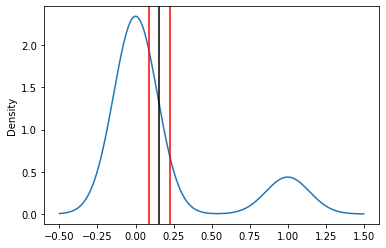

In [14]:
#plots republican budget votes and adds mean and mean +/- moe

rep['budget'].plot.density()
plt.axvline(x=ci[1], color='red')
plt.axvline(x=ci[0], color='black')
plt.axvline(x=ci[2], color='red')
plt.show()

In [15]:
#Compares this data to the above data

mean, variance, std_dev = stats.bayes_mvs(rep['budget'], alpha=0.95)
print(mean)
print(variance)
print(std_dev)

Mean(statistic=0.1574074074074074, minmax=(0.08761355698812176, 0.22720125782669306))
Variance(statistic=0.13641975308641976, minmax=(0.10416243207233418, 0.17845581020932047))
Std_dev(statistic=0.36847210103926065, minmax=(0.32274205191194744, 0.42244030372269226))


Bayesian statistics uses prior information in their formula for finding probability where as frequentist statistics uses what they have for data with no prior findings.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!